In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_behavior_analytcis.csv to customer_behavior_analytcis (1).csv


In [ ]:
df = pd.read_csv('customer_behavior_analytcis.csv')
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [ ]:
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (999, 6)

Data Types:
total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
dtype: object

Missing Values:
total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [ ]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%          10.000000       49.380000         40.360000      21.000000   
75%          17.000000      121.255000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


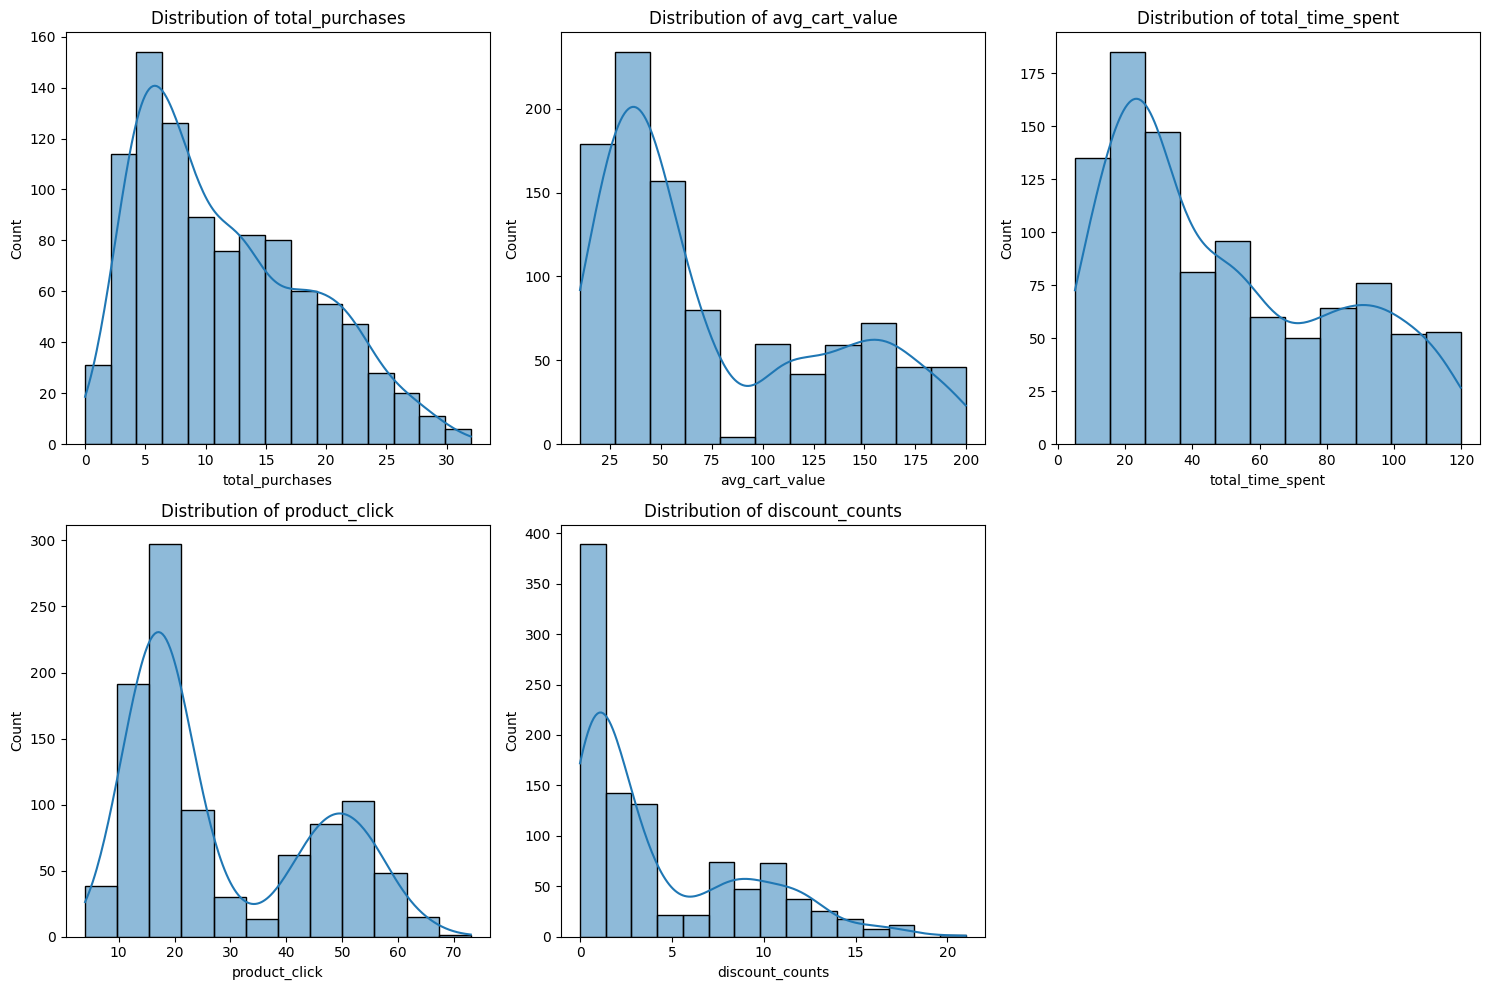

In [ ]:
# Visualizing distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(['total_purchases', 'avg_cart_value', 'total_time_spent',
                            'product_click', 'discount_counts']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

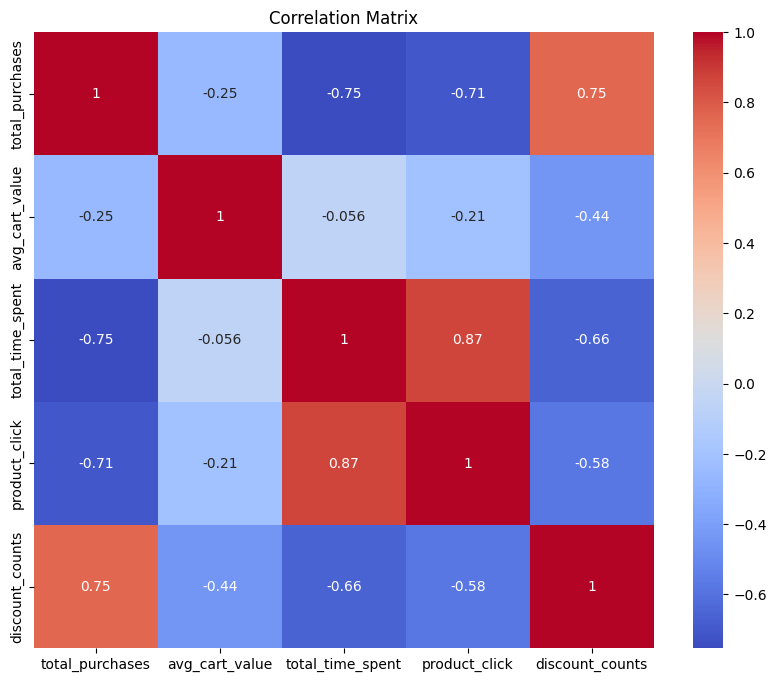

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('customer_id', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

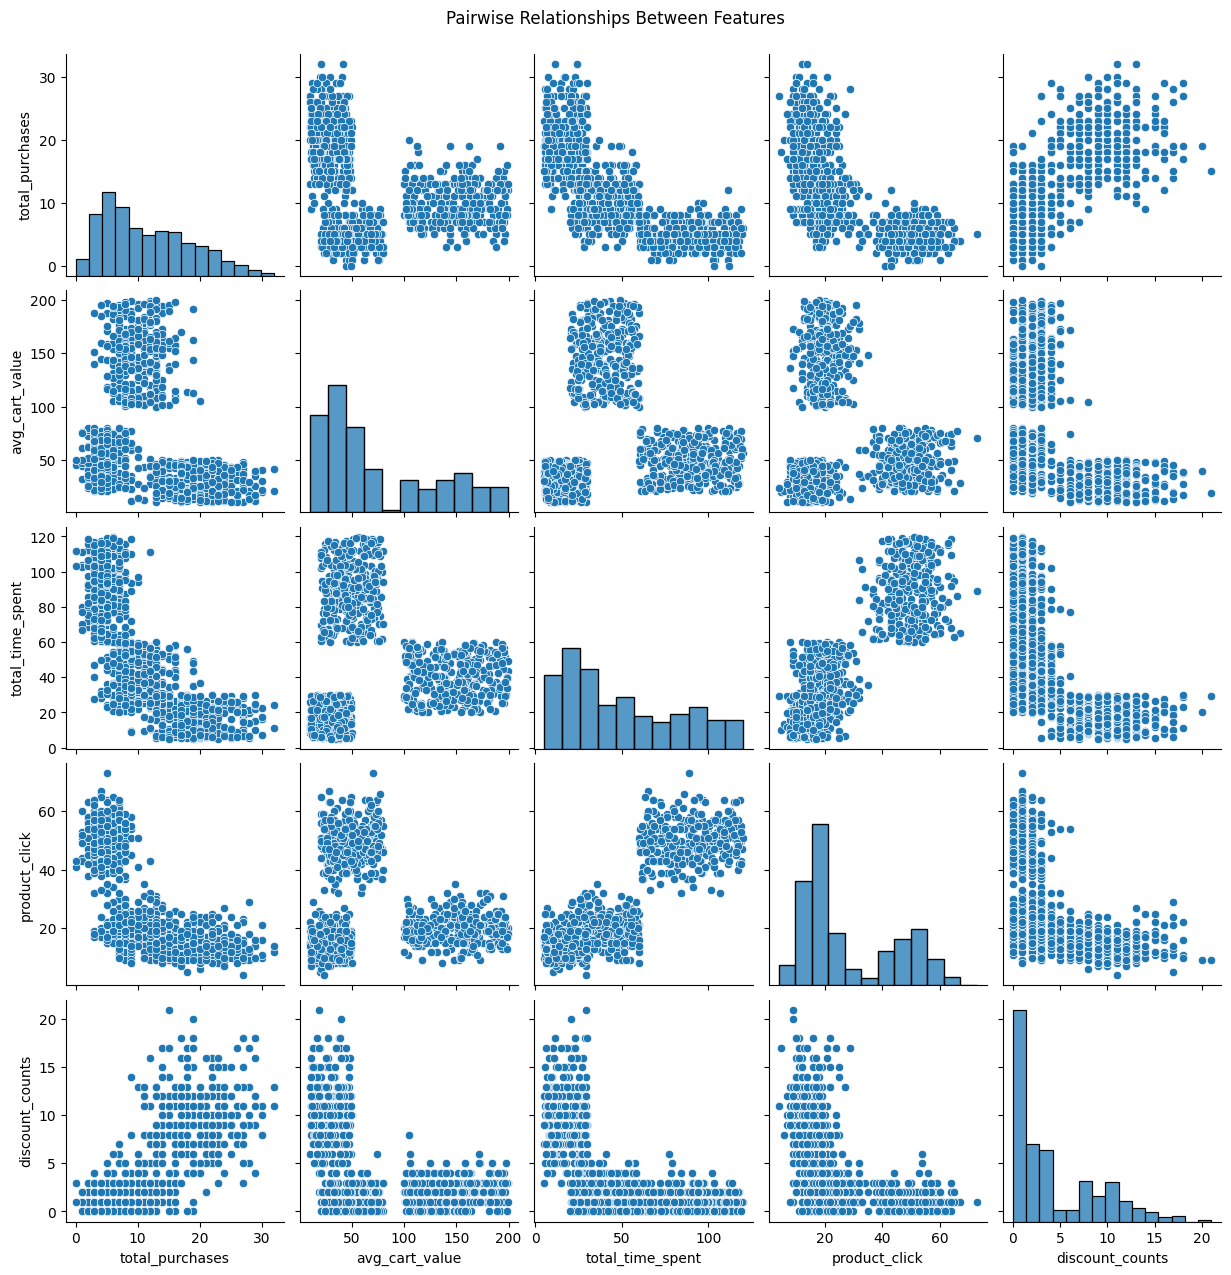

In [ ]:
# Pairplot for feature relationships
sns.pairplot(df.drop('customer_id', axis=1))
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

NaN values per column:
total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

Infinite values per column:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
dtype: int64


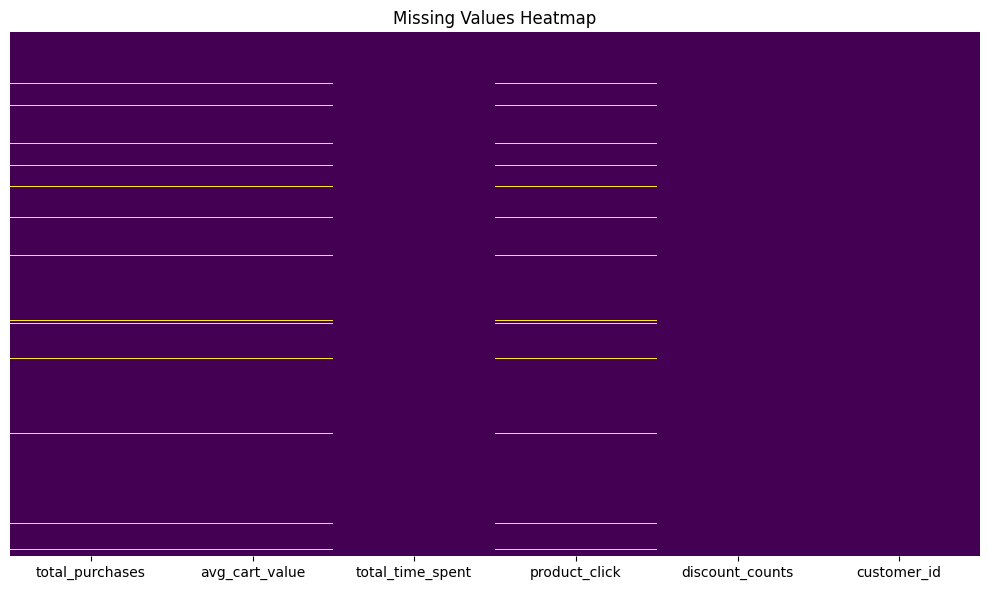

In [ ]:
# Check for NaN values explicitly
print("NaN values per column:")
print(df.isna().sum())

# Check for infinite values as well
print("\nInfinite values per column:")
print(np.isinf(df.select_dtypes(include=np.number)).sum())

# Visualize where NaNs appear
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Make a copy of the original dataframe
df_clean = df.copy()

# Check column types
print("Data types:")
print(df_clean.dtypes)

# Drop customer_id for analysis
features_df = df_clean.drop('customer_id', axis=1) if 'customer_id' in df_clean.columns else df_clean

# Handle missing values - directly replacing NaNs with column means
for column in features_df.columns:
    features_df[column] = features_df[column].fillna(features_df[column].mean())

# Verify there are NO NaN values
print("\nRemaining NaN values after cleaning:")
print(features_df.isna().sum())

# Check if there are any infinite values and replace them
features_df = features_df.replace([np.inf, -np.inf], np.nan)
features_df = features_df.fillna(features_df.mean())

# Final check - should all be False
print("\nAny NaN values left?", features_df.isna().any().any())
print("Any infinite values left?", np.isinf(features_df.values).any())

Data types:
total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
dtype: object

Remaining NaN values after cleaning:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
dtype: int64

Any NaN values left? False
Any infinite values left? False


In [ ]:
# Scale the data using the verified clean dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

In [ ]:
print("\nAny NaN values in scaled features?", np.isnan(scaled_features).any())


Any NaN values in scaled features? False


In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [ ]:
# Add cluster labels to the original dataframe
df_clean['cluster'] = kmeans_labels

In [ ]:
# Evaluate K-means
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.6133


In [ ]:
# Finding optimal number of clusters with Elbow method
inertia_values = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

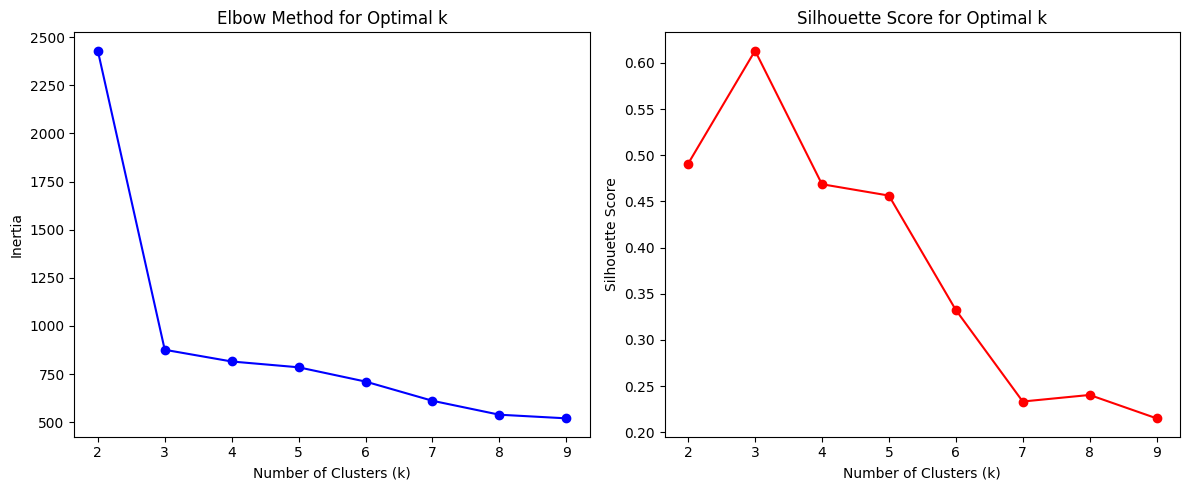

In [ ]:
# Plot Elbow method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

In [ ]:
# Apply final K-means with k=3 (as stated in the problem)
final_kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = final_kmeans.fit_predict(scaled_features)

In [ ]:
# Get cluster centers
centers = scaler.inverse_transform(final_kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=features.columns)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        10.212991      145.390574         40.472126      20.120186   
1         4.943626       49.348259         90.211837      49.457687   
2        19.540531       31.346684         17.511682      15.224222   

   discount_counts  
0         1.940120  
1         1.027108  
2         9.969970  


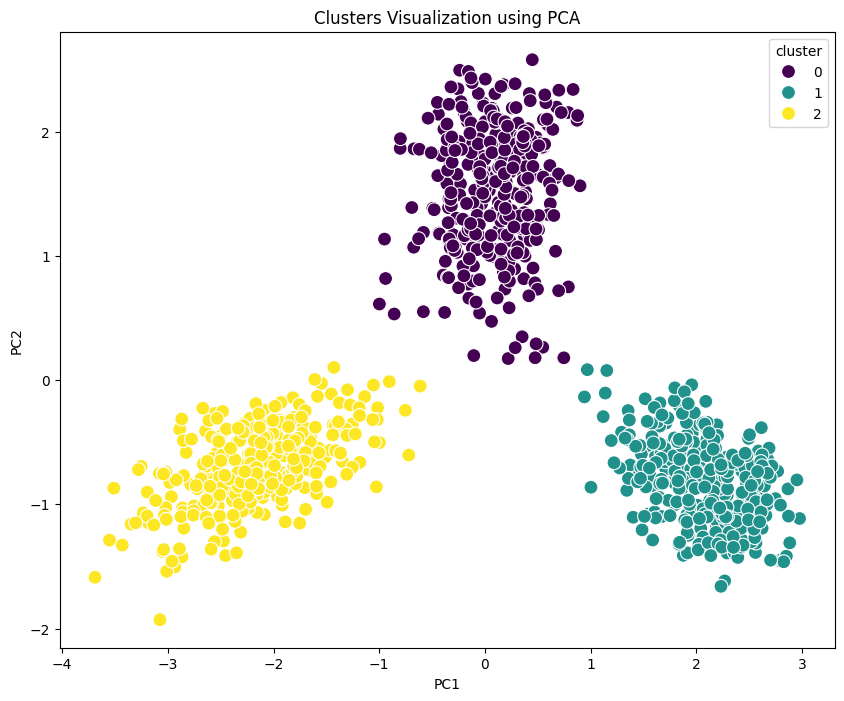

In [ ]:
# Visualize clusters with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters Visualization using PCA')
plt.show()

In [ ]:
# Analyze each cluster
for cluster_id in range(3):
    print(f"\nCluster {cluster_id} Statistics:")
    cluster_data = df[df['cluster'] == cluster_id].drop(['customer_id', 'cluster'], axis=1)
    print(cluster_data.describe().round(2))


Cluster 0 Statistics:
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count           325.00          325.00            334.00         325.00   
mean             10.18          147.33             40.47          19.90   
std               3.11           28.41             11.42           4.66   
min               3.00          100.00             20.01           8.00   
25%               8.00          121.79             30.45          17.00   
50%              10.00          148.33             40.39          20.00   
75%              12.00          167.64             50.26          23.00   
max              20.00          199.77             67.91          35.00   

       discount_counts  
count           334.00  
mean              1.94  
std               1.40  
min               0.00  
25%               1.00  
50%               2.00  
75%               3.00  
max               8.00  

Cluster 1 Statistics:
       total_purchases  avg_cart_value  total_time_sp

In [ ]:
# Radar chart for cluster profiles
def radar_chart(cluster_centers, feature_names):
    labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
    num_vars = len(feature_names)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

    for i, label in enumerate(labels):
        values = cluster_centers.iloc[i].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), feature_names)
    ax.set_ylim(0, 1.2 * cluster_centers.values.max())
    plt.legend(loc='upper right')
    plt.title('Cluster Profiles', size=20)
    plt.show()

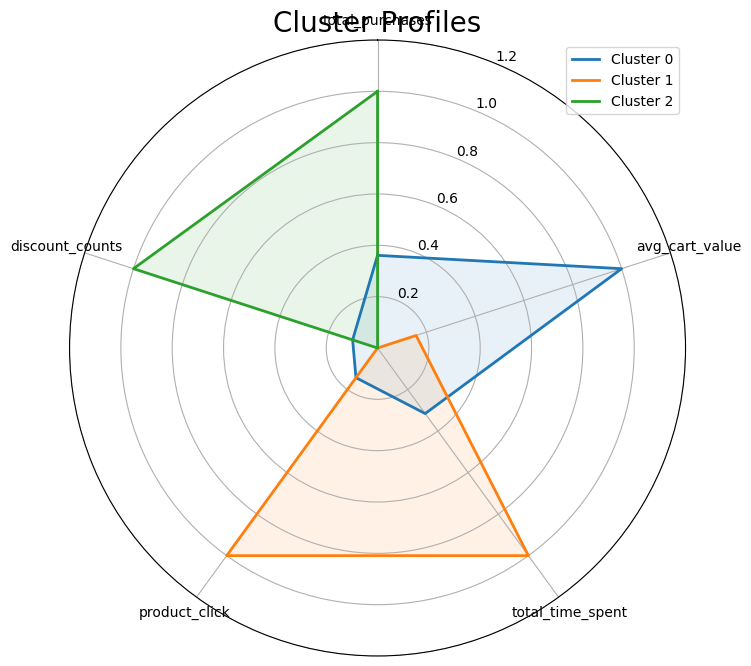

In [ ]:
# Scale cluster centers for radar chart
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_centers = pd.DataFrame(
    min_max_scaler.fit_transform(cluster_centers),
    columns=cluster_centers.columns
)
radar_chart(normalized_centers, cluster_centers.columns)